In [2]:
import requests
import pandas as pd

In [3]:
url = "https://dummyjson.com/products"

data = requests.get(url).json() # 3D Array
# Item example data['products'][0]['id']

In [4]:
df = pd.json_normalize(data['products'])
df.head()

,id,title,description,category,price,discountPercentage,rating,stock,tags,brand,...,minimumOrderQuantity,images,thumbnail,dimensions.width,dimensions.height,dimensions.depth,meta.createdAt,meta.updatedAt,meta.barcode,meta.qrCode
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,9.99,7.17,4.94,5,"[beauty, mascara]",Essence,...,24,[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...,23.17,14.43,28.01,2024-05-23T08:56:21.618Z,2024-05-23T08:56:21.618Z,9164035109868,https://assets.dummyjson.com/public/qr-code.png
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,19.99,5.50,3.28,44,"[beauty, eyeshadow]",Glamour Beauty,...,32,[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...,12.42,8.63,29.13,2024-05-23T08:56:21.618Z,2024-05-23T08:56:21.618Z,2817839095220,https://assets.dummyjson.com/public/qr-code.png
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,14.99,18.14,3.82,59,"[beauty, face powder]",Velvet Touch,...,25,[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...,24.16,10.70,11.07,2024-05-23T08:56:21.618Z,2024-05-23T08:56:21.618Z,0516267971277,https://assets.dummyjson.com/public/qr-code.png
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,12.99,19.03,2.51,68,"[beauty, lipstick]",Chic Cosmetics,...,6,[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...,14.37,13.94,14.60,2024-05-23T08:56:21.619Z,2024-05-23T08:56:21.619Z,9444582199406,https://assets.dummyjson.com/public/qr-code.png
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,8.99,2.46,3.91,71,"[beauty, nail polish]",Nail Couture,...,46,[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...,8.11,10.89,29.06,2024-05-23T08:56:21.619Z,2024-05-23T08:56:21.619Z,3212847902461,https://assets.dummyjson.com/public/qr-code.png


In [5]:
col_to_keep = ["id", "title", "description", "category", "tags", "images"]
df2 = df[col_to_keep].copy()
df2.head()

,id,title,description,category,tags,images
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,"[beauty, mascara]",[https://cdn.dummyjson.com/products/images/bea...
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,"[beauty, eyeshadow]",[https://cdn.dummyjson.com/products/images/bea...
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,"[beauty, face powder]",[https://cdn.dummyjson.com/products/images/bea...
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,"[beauty, lipstick]",[https://cdn.dummyjson.com/products/images/bea...
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,"[beauty, nail polish]",[https://cdn.dummyjson.com/products/images/bea...


In [6]:
# Adding comment from reviews as a column
y = []

for i in range(len(data['products'])):
  y.append([])
  for j in range(len(data['products'][i]['reviews'])):
    y[i].append(data['products'][i]['reviews'][j]['comment'])

df2.loc[:, "comment"] = pd.Series(y)
df2.head()

,id,title,description,category,tags,images,comment
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,"[beauty, mascara]",[https://cdn.dummyjson.com/products/images/bea...,"[Very unhappy with my purchase!, Not as descri..."
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,"[beauty, eyeshadow]",[https://cdn.dummyjson.com/products/images/bea...,"[Very satisfied!, Very disappointed!, Highly i..."
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,"[beauty, face powder]",[https://cdn.dummyjson.com/products/images/bea...,"[Very happy with my purchase!, Great value for..."
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,"[beauty, lipstick]",[https://cdn.dummyjson.com/products/images/bea...,"[Great product!, Very pleased!, Very pleased!]"
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,"[beauty, nail polish]",[https://cdn.dummyjson.com/products/images/bea...,"[Very pleased!, Great product!, Highly recomme..."


In [7]:
# Adding qrCode as a column
x = []

for i in range(len(data['products'])):
  x.append(data['products'][i]['meta']['qrCode'])

df2.loc[:, "qrCode"] = pd.Series(x)
df2.head()

,id,title,description,category,tags,images,comment,qrCode
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,"[beauty, mascara]",[https://cdn.dummyjson.com/products/images/bea...,"[Very unhappy with my purchase!, Not as descri...",https://assets.dummyjson.com/public/qr-code.png
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,"[beauty, eyeshadow]",[https://cdn.dummyjson.com/products/images/bea...,"[Very satisfied!, Very disappointed!, Highly i...",https://assets.dummyjson.com/public/qr-code.png
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,"[beauty, face powder]",[https://cdn.dummyjson.com/products/images/bea...,"[Very happy with my purchase!, Great value for...",https://assets.dummyjson.com/public/qr-code.png
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,"[beauty, lipstick]",[https://cdn.dummyjson.com/products/images/bea...,"[Great product!, Very pleased!, Very pleased!]",https://assets.dummyjson.com/public/qr-code.png
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,"[beauty, nail polish]",[https://cdn.dummyjson.com/products/images/bea...,"[Very pleased!, Great product!, Highly recomme...",https://assets.dummyjson.com/public/qr-code.png


In [8]:
df2 = df2[["id", "title", "description", "category", "tags", "comment", "qrCode", "images"]]
df2.head()

,id,title,description,category,tags,comment,qrCode,images
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,"[beauty, mascara]","[Very unhappy with my purchase!, Not as descri...",https://assets.dummyjson.com/public/qr-code.png,[https://cdn.dummyjson.com/products/images/bea...
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,"[beauty, eyeshadow]","[Very satisfied!, Very disappointed!, Highly i...",https://assets.dummyjson.com/public/qr-code.png,[https://cdn.dummyjson.com/products/images/bea...
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,"[beauty, face powder]","[Very happy with my purchase!, Great value for...",https://assets.dummyjson.com/public/qr-code.png,[https://cdn.dummyjson.com/products/images/bea...
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,"[beauty, lipstick]","[Great product!, Very pleased!, Very pleased!]",https://assets.dummyjson.com/public/qr-code.png,[https://cdn.dummyjson.com/products/images/bea...
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,"[beauty, nail polish]","[Very pleased!, Great product!, Highly recomme...",https://assets.dummyjson.com/public/qr-code.png,[https://cdn.dummyjson.com/products/images/bea...


In [9]:
# To clean strings in tags, comment and images
import re
for col in ['tags', 'comment', 'images']:
  df2[col] = df2[col].apply(lambda x: re.sub(r"[\[\]']", "", str(x)))

df2.head()

,id,title,description,category,tags,comment,qrCode,images
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,"beauty, mascara","Very unhappy with my purchase!, Not as describ...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,"beauty, eyeshadow","Very satisfied!, Very disappointed!, Highly im...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,"beauty, face powder","Very happy with my purchase!, Great value for ...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,"beauty, lipstick","Great product!, Very pleased!, Very pleased!",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,"beauty, nail polish","Very pleased!, Great product!, Highly recommen...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...


In [10]:
# Alternate way to do the same
for i in range(len(df2)):
  df2.loc[i, "tags"] = str(df2.loc[i, "tags"]).replace("[", "").replace("]", "").replace("'", "")
  df2.loc[i, "comment"] = str(df2.loc[i, "comment"]).replace("[", "").replace("]", "").replace("'", "").replace("!", "")
  df2.loc[i, "images"] = str(df2.loc[i, "images"]).replace("[", "").replace("]", "").replace("'", "")

df2.head()

,id,title,description,category,tags,comment,qrCode,images
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,"beauty, mascara","Very unhappy with my purchase, Not as describe...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,"beauty, eyeshadow","Very satisfied, Very disappointed, Highly impr...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,"beauty, face powder","Very happy with my purchase, Great value for m...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,"beauty, lipstick","Great product, Very pleased, Very pleased",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,"beauty, nail polish","Very pleased, Great product, Highly recommended",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...


In [11]:
df2['price'] = df['price']
df2['discount'] = df['discountPercentage']
df2['stock'] = df['stock']
df2.head()

,id,title,description,category,tags,comment,qrCode,images,price,discount,stock
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,"beauty, mascara","Very unhappy with my purchase, Not as describe...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,9.99,7.17,5
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,"beauty, eyeshadow","Very satisfied, Very disappointed, Highly impr...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,19.99,5.50,44
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,"beauty, face powder","Very happy with my purchase, Great value for m...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,14.99,18.14,59
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,"beauty, lipstick","Great product, Very pleased, Very pleased",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,12.99,19.03,68
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,"beauty, nail polish","Very pleased, Great product, Highly recommended",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,8.99,2.46,71


Text(12, 2499.99, 'Annibale Colombo Sofa')

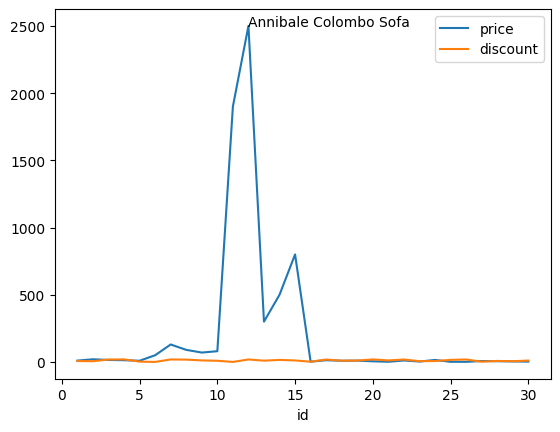

In [23]:
import matplotlib.pyplot as plt

id_max = df2['price'].idxmax()
title_max = df2.loc[id_max, 'title']


df2.plot(x = "id", y= ["price", "discount"])
plt.annotate(title_max, (df2.loc[id_max, 'id'], df2.loc[id_max, 'price'])) # Annotate item with highest price

<Axes: >

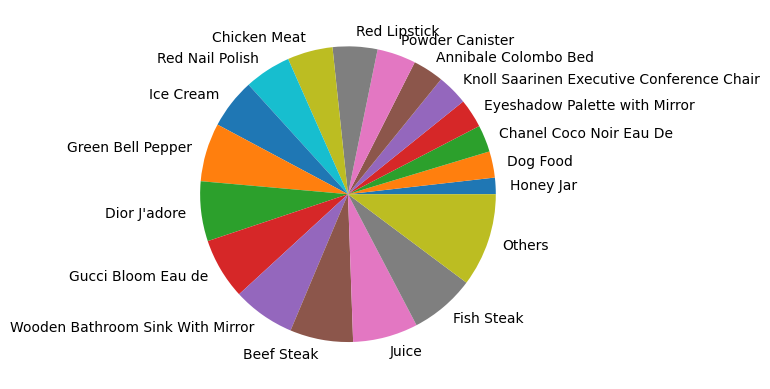

In [13]:
stock_sum = df2.groupby('title')['stock'].sum().sort_values()

# Filter and bundle out titles with stock less than 25
stock_sum_filtered = stock_sum[stock_sum >= 25]
other_stock = stock_sum[stock_sum < 25].sum()
stock_sum_filtered['Others'] = other_stock

stock_sum_filtered.plot(kind = 'pie', label = '')

In [14]:
df2['width'] = df['dimensions.width']
df2['height'] = df['dimensions.height']
df2['depth'] = df['dimensions.depth']
df2.head()

,id,title,description,category,tags,comment,qrCode,images,price,discount,stock,width,height,depth
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,"beauty, mascara","Very unhappy with my purchase, Not as describe...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,9.99,7.17,5,23.17,14.43,28.01
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,"beauty, eyeshadow","Very satisfied, Very disappointed, Highly impr...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,19.99,5.50,44,12.42,8.63,29.13
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,"beauty, face powder","Very happy with my purchase, Great value for m...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,14.99,18.14,59,24.16,10.70,11.07
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,"beauty, lipstick","Great product, Very pleased, Very pleased",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,12.99,19.03,68,14.37,13.94,14.60
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,"beauty, nail polish","Very pleased, Great product, Highly recommended",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,8.99,2.46,71,8.11,10.89,29.06


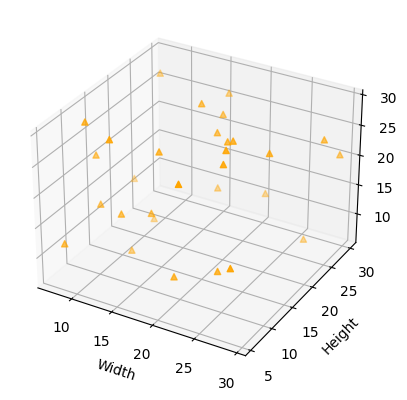

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter(df2['width'], df2['height'], df2['depth'], marker = '^', c = "orange")
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Depth')
plt.show()